# Multiple Spherical Voids

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
BoxLength = 100
N = 5000
R = [5, 10, 15, 20]

# Void Type: SV MSV IV MIV
# (Spherical Void, Multiple Spherical Voids, Irregular Void, Multiple Irregular Void)
VOID_TYPE = "MSV"

np.seed = 10000

Beta = 1.0

In [3]:

# Observational Catalog

prefix = "/home/filipo/master_thesis/data/Testing_Data/"
filename = prefix + str(VOID_TYPE) + "_R" + str(R) + "_BL_" + str(BoxLength) + "_N" + str(N) + ".cat"

print("Loading the Observed Catalog from the file:", filename)
OC = np.loadtxt(filename)


# Random Field Catalog
RC = np.zeros([N,3])
print("Generating Random Point Catalog")
for r in RC:
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()
    
    r += BoxLength * np.array([a,b,c])


Loading the Observed Catalog from the file: /home/filipo/master_thesis/data/Testing_Data/MSV_R[5, 10, 15, 20]_BL_100_N5000.cat
Generating Random Point Catalog


plt.scatter RC and OC


<IPython.core.display.Javascript object>


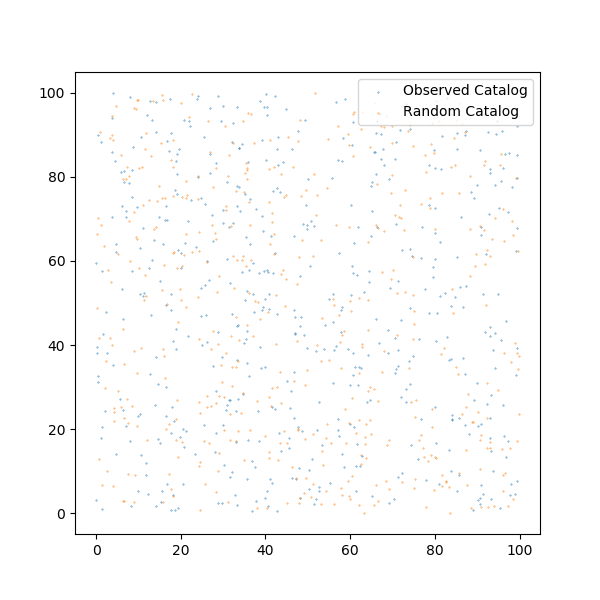

<IPython.core.display.Javascript object>


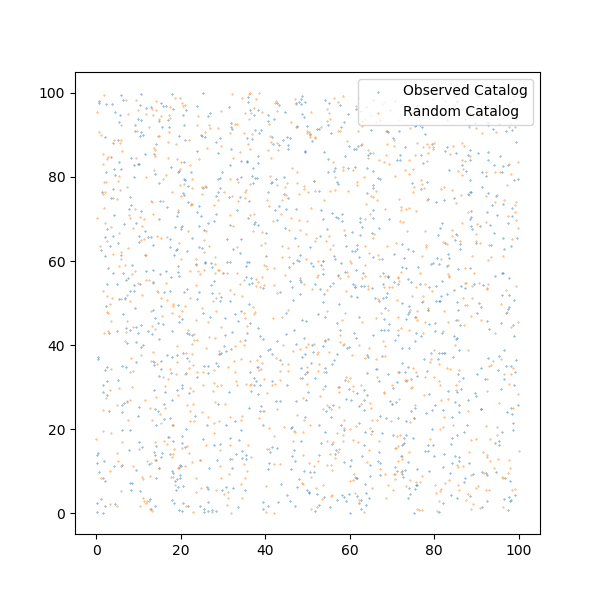

<IPython.core.display.Javascript object>


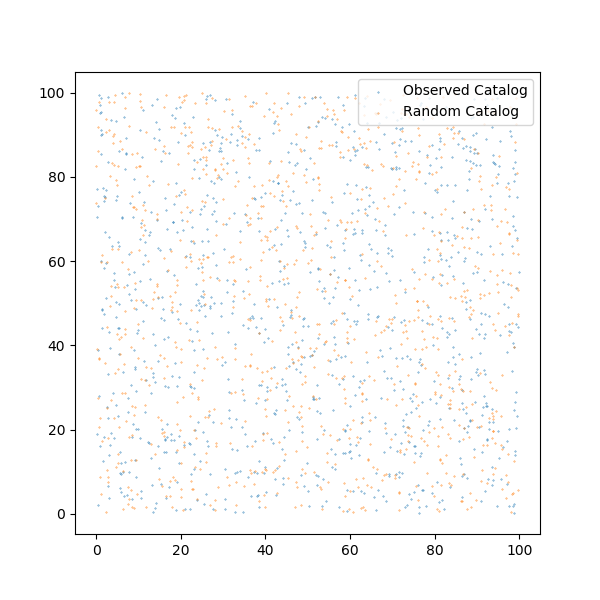

<IPython.core.display.Javascript object>


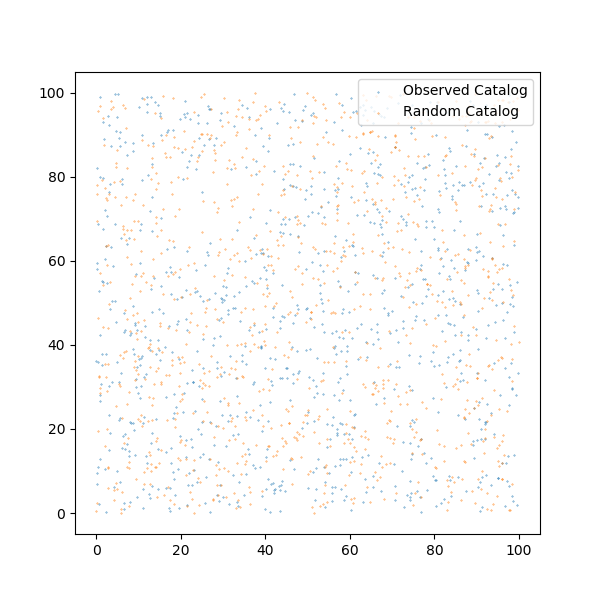

<IPython.core.display.Javascript object>


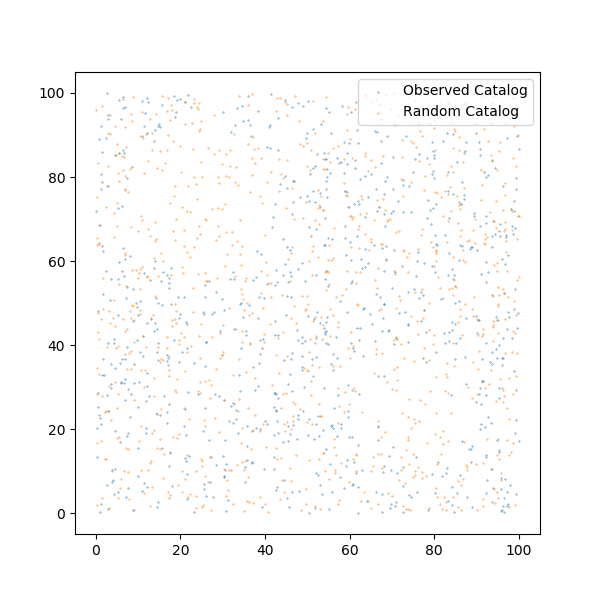

<IPython.core.display.Javascript object>


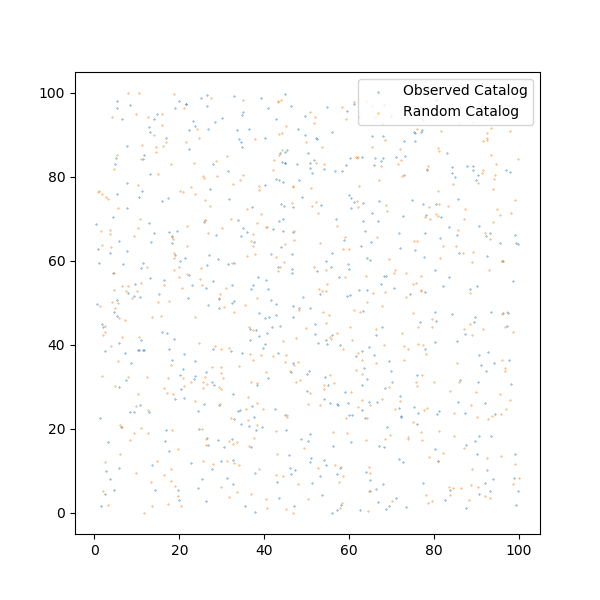

In [4]:
print("plt.scatter RC and OC")

for k in np.linspace(0.0,1.0,6):
    slice_height = 10

    fig = plt.figure(figsize=[6,6])

    index = np.where( abs(OC[:,2] - BoxLength * k) < slice_height )        
    plt.scatter(OC[index,0], OC[index,1], s=0.1, label="Observed Catalog")

    index = np.where( abs(RC[:,2] - BoxLength * k) < slice_height )        
    plt.scatter(RC[index,0], RC[index,1], s=0.1, label="Random Catalog")
    plt.legend(loc=1)

    #index = np.where( abs(void_cat[:,2] - BoxLength / 2) < slice_height )        
    #plt.scatter(void_cat[index,0], void_cat[index,1], s=10)

    
    plt.savefig("slice_OC_plus_RC" +
                    "_N" + str(N) +
                    "_BL" + str(BoxLength) +
                    "_R" + str(R) +
                     ".pdf", format="pdf")

In [5]:
# Create the full catalog, by vertical stacking Random Catalog and Obs. Catalog.

FC = np.vstack([RC,OC])

FC.shape

(10000, 3)

In [7]:
filename = "FC_N" + str(N) + "_" + str(VOID_TYPE) + "_R" + str(R) +".cat"

np.savetxt(filename, FC)

#filename = "FC_N100.cat"

#with open( filename, "w") as file: 
#    for v in FC: 
#        file.write(str(v[0])+" "+str(v[1])+" "+str(v[2])+"\n")

print("Data saved to '" + filename + "'.")

Data saved to 'FC_N5000_MSV_R[5, 10, 15, 20].cat'.


The random set has been created. Go to terminal and run "make BETA=1.0"

```bash
make NPARTICLES=5000 BETA=1.0 VOID_TYPE=MIV
```

In [9]:
filename ="FC_N5000_MSV_R_5_10_15_20_Beta1.0.bsk"

print(filename)

FC_N5000_MSV_R_5_10_15_20_Beta1.0.bsk


In [10]:


print(" Loading " + str(Beta) + "-Skeleton from the file: " + filename)
# Full Catalog (cat + rndm) Beta Skeleton
fcBSkel = np.loadtxt(filename)

 Loading 1.0-Skeleton from the file: FC_N5000_MSV_R_5_10_15_20_Beta1.0.bsk


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

x = FC[:,0]
y = FC[:,1]
z = FC[:,2]

BS_size = fcBSkel.shape[0]

ax.scatter(x, y, z)

for n in range(BS_size):
    i, j = fcBSkel[n]
    
    i = int(i)
    j = int(j)
    
    ax.plot([x[i], x[j]], [y[i],y[j]], zs=[z[i],z[j]])
    
plt.show()

In [11]:
fcBSkel = fcBSkel.astype(int)

In [12]:
index = np.where( fcBSkel[:,0] < N )[0]

first_filter = fcBSkel[index].astype(int)
first_filter.shape

(37606, 2)

<IPython.core.display.Javascript object>


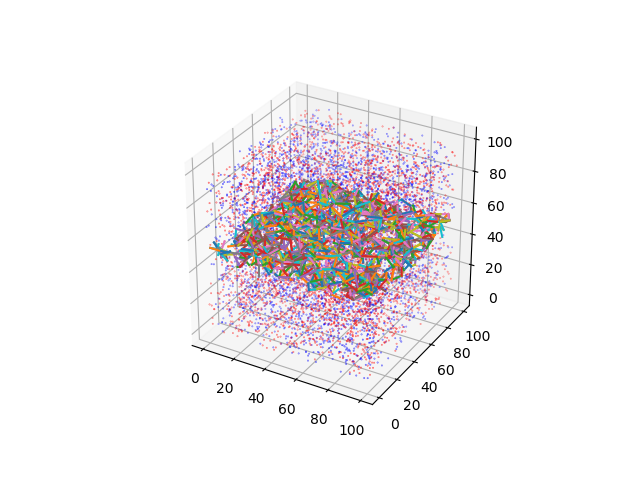

In [13]:
BetaSkeleton = first_filter


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


x = FC[:,0]
y = FC[:,1]
z = FC[:,2]

# Random Points
x_r = FC[:N,0]
y_r = FC[:N,1]
z_r = FC[:N,2]


ax.scatter(x_r, y_r, z_r, c="blue", s=0.1)

# Random Points
x_o = FC[N:,0]
y_o = FC[N:,1]
z_o = FC[N:,2]

ax.scatter(x_o, y_o, z_o, c="red", s=0.1)

slice_height = 5

BS_size = BetaSkeleton.shape[0]
for n in range( BS_size ):
    i, j = BetaSkeleton[n]
    #print (BetaSkeleton[n])
    
    i = int(i)
    j = int(j)
    
    if( (abs(z[i] - BoxLength/2) < slice_height)
        &(abs(z[j] - BoxLength/2) < slice_height) ):
        ax.plot(xs=[x[i], x[j]], ys=[y[i],y[j]], zs=[z[i],z[j]])
    
plt.show()

plt.savefig("scatter_OC_RC_plus_slice_of_" +
                str(Beta) + "-Skeleton" +
                "_N" + str(N) +
                "_BL" + str(BoxLength) +
                "_R" + str(R) +
                 ".pdf", format="pdf")

In [14]:
index = np.where( first_filter[:,1] >= N )[0]
droplist_raw = first_filter[index,0]

In [15]:
droplist = set(droplist_raw)

In [16]:
len(droplist)

4851

In [17]:
rndmcat_index = set(range(N))

candidates = rndmcat_index.difference(droplist)
candidates = list(candidates)
void_cat = FC[candidates]

In [18]:
def IsInsideVoid(v):
    # Position vector components
    x = v[0]
    y = v[1]
    z = v[2]
    
    # Void sphere center
    x0 = 0.50 * BoxLength
    y0 = 0.50 * BoxLength
    z0 = 0.50 * BoxLength

    # Distance to the void center
    d = ( (x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2)**0.5 
    
    if ( d < R ):
        return 1;
    else:
        return 0;

<IPython.core.display.Javascript object>


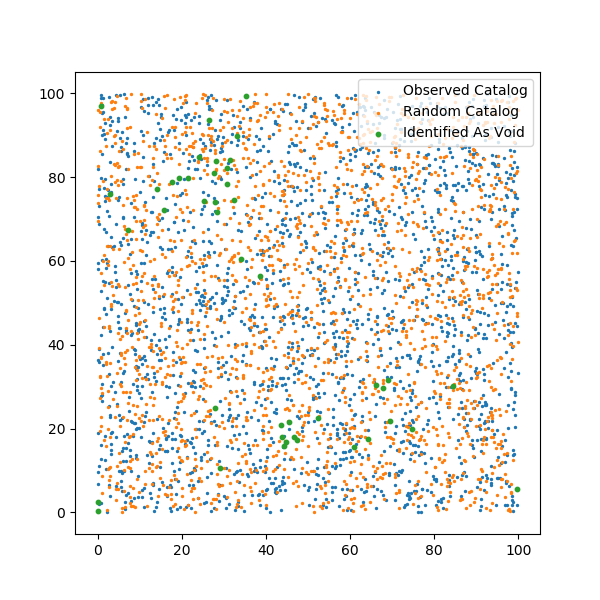

In [19]:
slice_height = 20

fig = plt.figure(figsize=[6,6])

index = np.where( abs(OC[:,2] - BoxLength / 2) < slice_height )        
plt.scatter(OC[index,0], OC[index,1], s=2, label="Observed Catalog")

index = np.where( abs(RC[:,2] - BoxLength / 2) < slice_height )        
plt.scatter(RC[index,0], RC[index,1], s=2, label="Random Catalog")

index = np.where( abs(void_cat[:,2] - BoxLength / 2) < slice_height )        
plt.scatter(void_cat[index,0], void_cat[index,1], s=10, label="Identified As Void")

plt.legend(loc=1)

plt.savefig("slice_OC_RC_plus_VP" +
                "_N" + str(N) +
                "_BL" + str(BoxLength) +
                "_R" + str(R) +
                 ".pdf", format="pdf")

(149, 3)


<IPython.core.display.Javascript object>


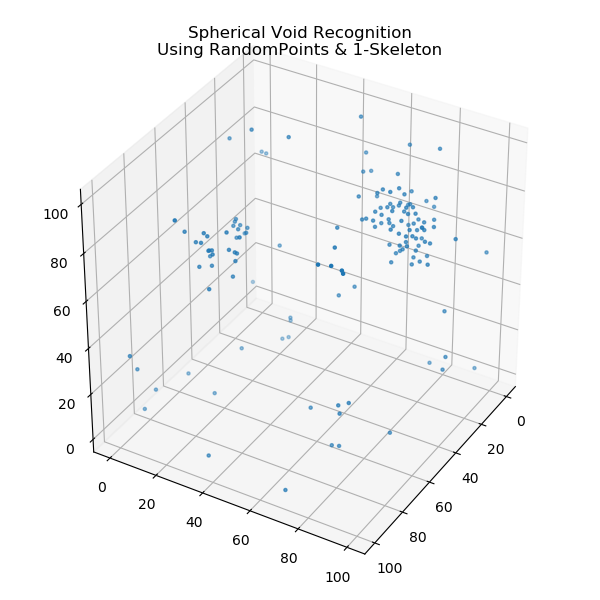

In [20]:
sphere = void_cat
print(sphere.shape)

x = sphere[:,0]
y = sphere[:,1]
z = sphere[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=5)
ax.view_init(30, 30)

plt.title("Spherical Void Recognition\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()

#plt.close()

plt.show()


plt.savefig("RandomPoints_Recognized_Void_" 
            + str(VOID_TYPE) +"_N" + str(N) 
            + "_BL" + str(BoxLength)
            + "_R" + str(R) 
            + "_" + str(Beta) + "-skeletons.pdf")
            